# Predicting if a Person made a purchase or did not purchase from a social media ad using Logistic Regression Model:

### Logistic regression: - is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

In [1]:
# Import necessary modules:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the datset:

df = pd.read_csv(r'C:\Users\singhegm\Downloads\archive7.1\Social_Network_Ads.csv')

In [3]:
# Exploring our Dataset:

df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


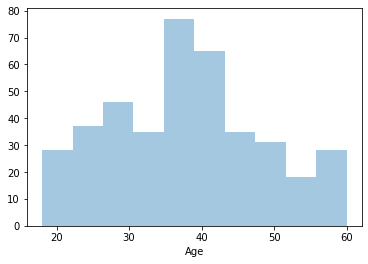

In [4]:
# Plotting different age category:

sns.distplot(df.Age, kde=False)

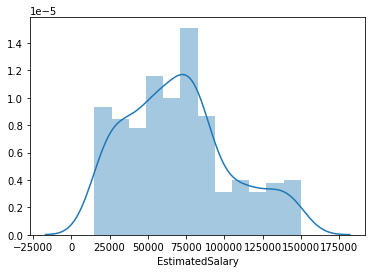

In [5]:
# Plotting the range of salary:

sns.distplot(df.EstimatedSalary)

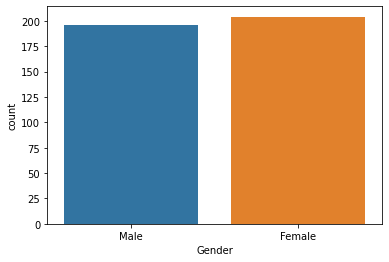

In [6]:
# Count of male and female:

sns.countplot(df.Gender)

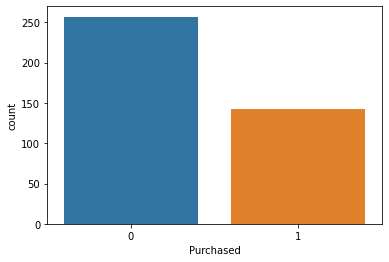

In [7]:
# Count of purchased and not purhcased:

sns.countplot(df.Purchased)

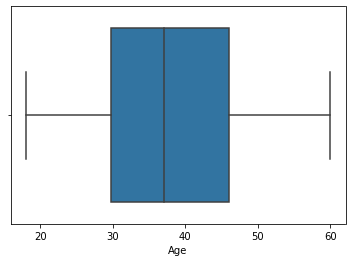

In [8]:
# Understanding the distribution of different age category:

sns.boxplot(df.Age)

In [9]:
# Lets convert the string values of the column Gender to 1-Male and 0-Female:

from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [10]:
# Deciding our target variable and the independent variables:

X = df.drop(['User ID','Purchased'], axis=1)
y = df['Purchased']

In [11]:
# Divivding our training and test data:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [12]:
# Now finally building our Logistic Regression Model:

from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Finding the predicted values for our test dataset:

pred = log.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [14]:
# Now we find out the accuracy and other performance metrics of the model using confusion matrix:

from sklearn.metrics import accuracy_score, confusion_matrix

In [15]:
accuracy_score(y_test, pred)

0.65

In [16]:
confusion_matrix(y_test, pred)

array([[52,  0],
       [28,  0]], dtype=int64)

# Now lets predict if the new entry with new X_values will make the purhcase or not-

In [17]:
X_new = np.array([0, 49, 150000]).reshape(1, -1)
X_new

array([[     0,     49, 150000]])

In [18]:
y_newpred = log.predict(X_new)
print(y_newpred)

[0]
